>> # PR Final Project : Diabetes analysis

## 1. Introduction to your dataset and loading:

#### 1. Source of the data where you download the data from
- We have taken the diabetes data set from Kaggle for our analysis today. You can download it by following the above link. link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


#### 2. Description of the dataset
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 
- The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### 3. Load the dataset
- Let us import all the libraries and then we will load the dataset.
- The data file we are using is "diabetes.csv"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Understanding the Data
- This operation helps us understand some of the key information like names of the columns, data type of each column, the total number of records, no. of columns, etc.,
- This helps us sense check the tidiness of data. For example, the age field should always be int type, it cannot be of string type.

In [3]:
#Reviewing the data frame info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Let us see the top 5 records to better understand the data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Observations:
- When we see the above table, values for Glucose, Blood Pressure, SkinThickness, Insulin are 0, which is not possible in the real world. So, as part of our data cleansing exercise(covered in the next steps), we have to drop all such records from our data frame.

In [5]:
# Describe various properties of the data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Try to understand the outcomes
# To understand what are the types of outcomes

print(df['Outcome'].unique())
print(df['Outcome'].value_counts())

[1 0]
0    500
1    268
Name: Outcome, dtype: int64


Observations:
- There are only two outcomes 0 and 1, 0 refers to No Diabetes and 1 means the person is having diabetes
- The data set looks quite imbalanced as there are 500 people who are healthy and just 268 people who have diabetes.

#### 4. Data cleaning and preprocessing

In [7]:
# Cleansing the Data

df=df[df['Insulin']!=0]
df=df[df['BloodPressure']!=0]
df=df[df['SkinThickness']!=0]
df=df[df['BMI']!=0]
df=df[df['Glucose']!=0]

In [8]:
# Let us try to once again see the data after dropping the records with 0 values for Insulin, Blood Pressure, Skin Thickness, BMI, and glucose levels

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- We can see from the above table that the “min” values for Insulin, Blood Pressure, Skin Thickness, BMI, and glucose levels are no more 0’s. Our data cleansing worked.

#### 5. Handling missing values

In [9]:
# To check if there are any null values in the data set
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values, we are good with it. If there are null values in the data set based on what is more meaningful to us, we can either drop that particular record or replace the null value with mean or median.

## 2. Define your final goal in this analysis and what problem you are trying to solve. For example, you might want to build a predictive model to estimate an attribute using your data and a regression model, or a classification problem, or you just want to discover novel insights from your data using exploratory data analysis.


- Our goal today is to draw meaningful inferences which in turn will be used in identifying Diabetes in a person.
- We will first analyse the data and then will comeup with the best model, using that can accuratly predict the diabetes in person.

## 3. Perform an exploratory data analysis:

#### 1. Data visulization


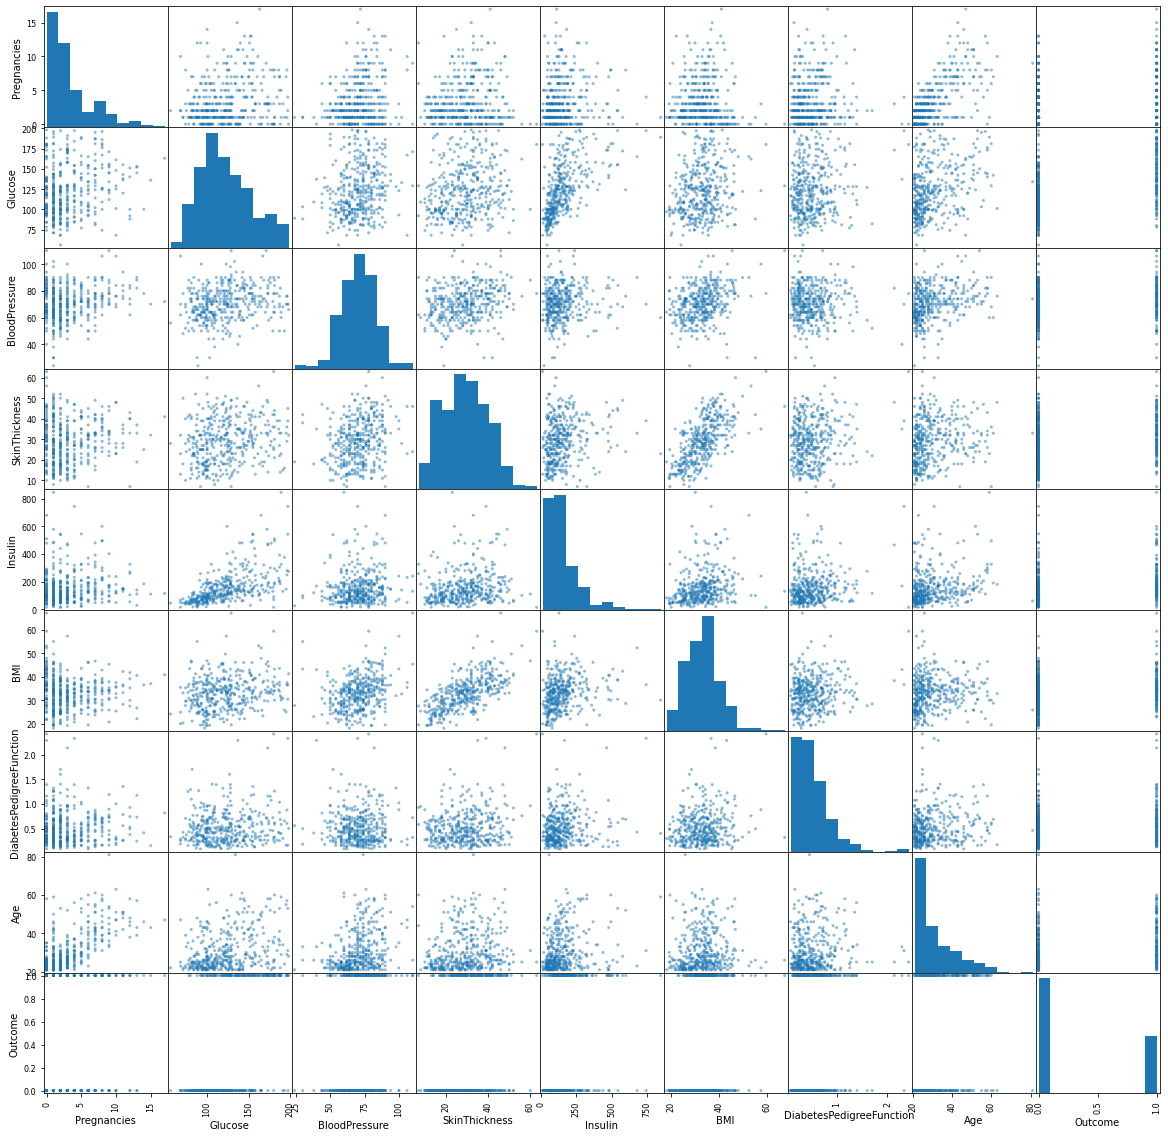

In [10]:
# Scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

#### 2. Distribution/histogram of fields in the dataset

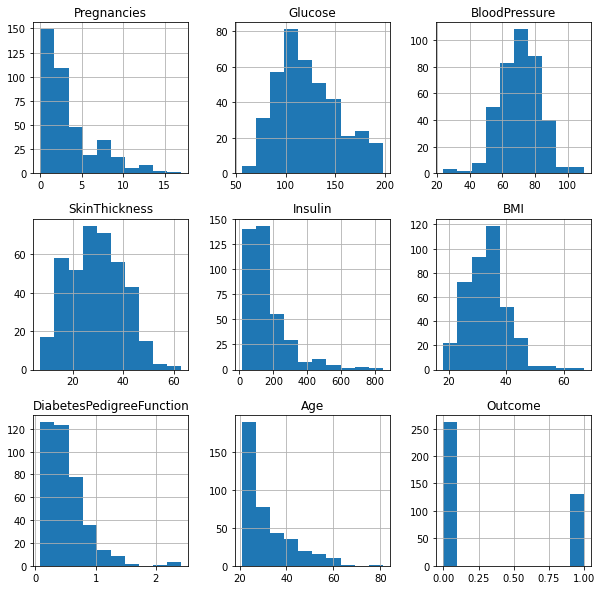

In [11]:
# Histogram of each feature

df .hist (bins=10, figsize=(10,10))
plt.show()

#### 3. Plot some variables over the others. Do you see any interesting relationships?
- Let us draw a simple scatterplot by projecting outcomes based on two features Glucose and Insulin

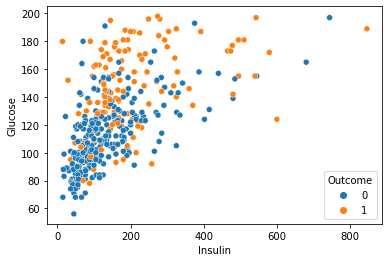

In [12]:
sns.scatterplot(data=df,x='Insulin',y='Glucose',hue='Outcome')
plt.show()

- The outcomes are all over the place. We need something to classify the outcomes based on these two features. Let's plot similar graphs for all the features.
- Now, let us do pair plot

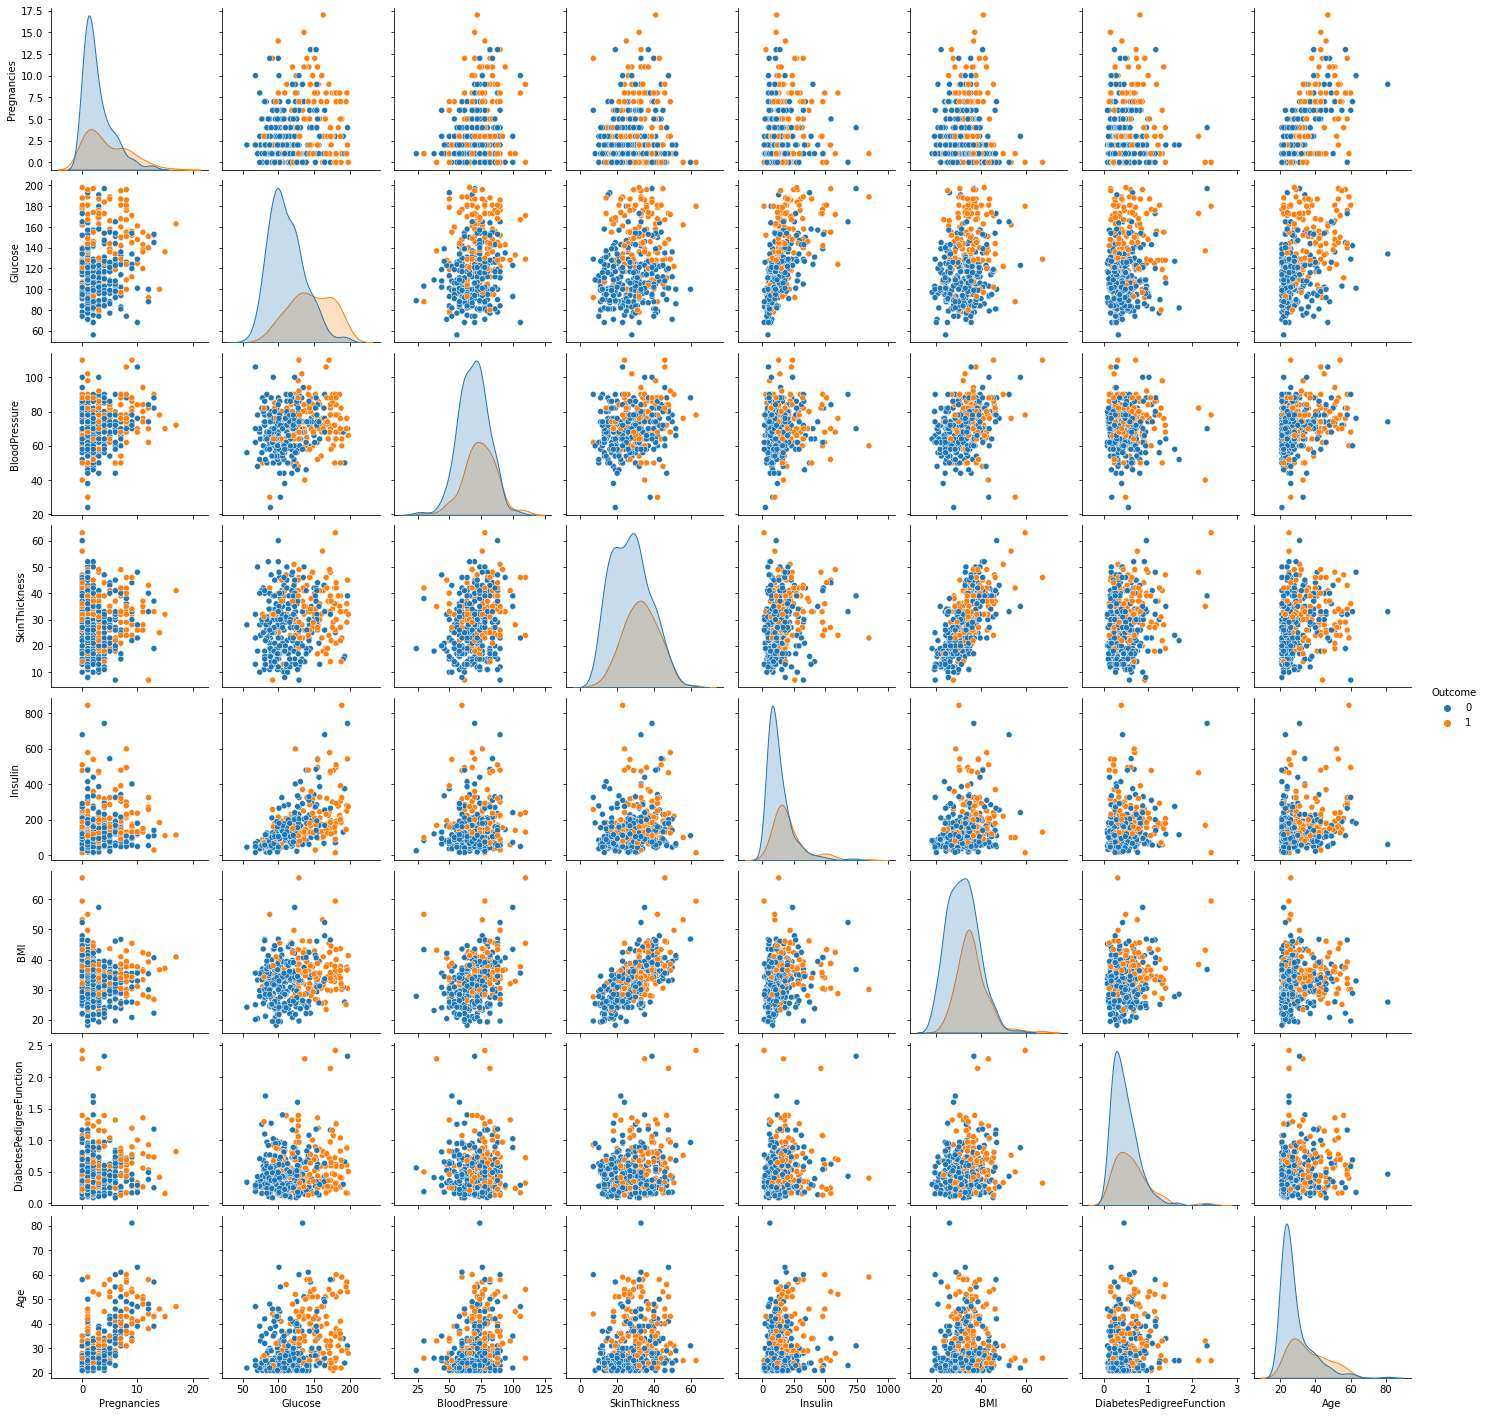

In [13]:
sns.pairplot(df,hue='Outcome')

- By looking at the graph we can say that (Glucose, Insulin),(SkinThickness, BMI) are useful in classifying the outcomes.

- Although not so accurate, these features are better than others. To support this analysis let us also plot a Spearman Rank correlation coefficient heatmap to find the relation between the variables.

#### 4. Correlation analysis

<AxesSubplot:>

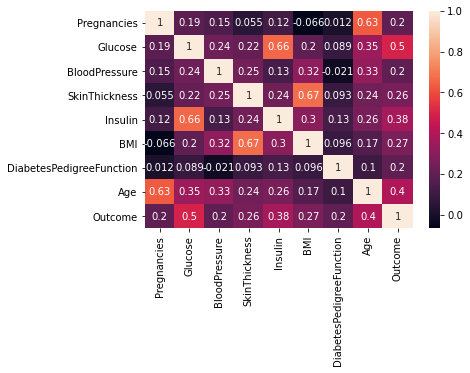

In [14]:
corr = df.corr(method='spearman')
sns.heatmap(corr,annot=True)

#### 5. What variables are more important in explaining your target variable?

- From the above graph, we can see that the relationship is very strong for the below features
> 1. Age-Pregnancies
> 2. SkinThickness-BMI
> 3. Glucose-Insulin
- In addition to what we have observed in Pair plot analysis, we also found a strong relationship between age and pregnancy.


#### 6. Principal component analysis

- Before peforming PCA let us just train model and check the accuracy. After that we will apply PCA and then again check the accuracy if we are getting good or not.

In [15]:
target_name = 'Outcome'
df = pd.read_csv('diabetes.csv')

# Separate object for target feature
y = df[target_name]

# Separate Object for Input Features
X = df.drop(target_name, axis=1)

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

- Here, we are using three models LogisticRegression, DecisionTreeClassifier and RandomForestClassifier

In [18]:
#Scalling

scaler = StandardScaler()
scaler. fit(X)
SSX = scaler. transform(X)

In [19]:
#Splitting data set into train and test

X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [20]:
#LogisticRegression

lr = LogisticRegression(solver='liblinear' ,multi_class='ovr')
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
lr_pred.shape
print("Train Accuracy of Logistic Regression",lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression" ,accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 77.68729641693811
Accuracy (Test) score of Logistic Regression 78.57142857142857
Accuracy (Test) score of Logistic Regression 78.57142857142857


In [21]:
#DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt. fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_pred.shape
print("Train Accuracy of Decesion Tree", dt.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decesion Tree",dt.score(X_test, y_test)*100)
print("Accuracy score of Decesion Tree",accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decesion Tree 100.0
Accuracy (Test) score of Decesion Tree 73.37662337662337
Accuracy score of Decesion Tree 73.37662337662337


In [22]:
#RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_pred.shape
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 77.92207792207793
Accuracy score of Random Forest 77.92207792207793


- As you can see RandomForestClassifier gives best accuracy then others

In [23]:
#Let us perform PCA

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# LogisticRegression with PCA

lr = LogisticRegression( solver='liblinear' ,multi_class='ovr')
lr.fit(X_train_pca,y_train)
lr_pred=lr.predict(X_test_pca)
print("Train Accuracy of Logistic Regression",lr.score(X_train_pca, y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test_pca, y_test)*100)
print("Accuracy (Test) score of Logistic Regression" ,accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 76.2214983713355
Accuracy (Test) score of Logistic Regression 77.92207792207793
Accuracy (Test) score of Logistic Regression 77.92207792207793


In [25]:
# DecisionTreeClassifier with PCA

dt=DecisionTreeClassifier()
dt. fit(X_train_pca,y_train)
dt_pred=dt.predict(X_test_pca)
print("Train Accuracy of Decesion Tree", dt.score(X_train_pca,y_train)*100)
print("Accuracy (Test) score of Decesion Tree",dt.score(X_test_pca, y_test)*100)
print("Accuracy score of Decesion Tree",accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decesion Tree 100.0
Accuracy (Test) score of Decesion Tree 65.5844155844156
Accuracy score of Decesion Tree 65.5844155844156


In [26]:
#RandomForestClassifier with PCA

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train_pca,y_train)
rf_pred=rf.predict(X_test_pca)
print("Train Accuracy of Random Forest",rf.score(X_train_pca,y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test_pca, y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 73.37662337662337
Accuracy score of Random Forest 73.37662337662337


- As we can see, after applying PCA, only logistic regression gets improved and it gave 77.21% accuracy.

#### 7. Feature selection

In [27]:
target_name = 'Outcome'
df = pd.read_csv('diabetes.csv')

# Separate object for target feature
y = df[target_name]

# Separate Object for Input Features
X = df.drop(target_name, axis=1)

test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X,y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])
X = features
X

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[  6.  148.   72.   35.    0.   33.6  50. ]
 [  1.   85.   66.   29.    0.   26.6  31. ]
 [  8.  183.   64.    0.    0.   23.3  32. ]
 [  1.   89.   66.   23.   94.   28.1  21. ]
 [  0.  137.   40.   35.  168.   43.1  33. ]]


array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [28]:
#Scaling
scaler = StandardScaler()
scaler. fit(X)
SSX = scaler. transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [30]:
# LogisticRegression with Feature selection

lr = LogisticRegression(solver='liblinear' ,multi_class='ovr')
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print("Train Accuracy of Logistic Regression",lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression" ,accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 76.71009771986971
Accuracy (Test) score of Logistic Regression 80.51948051948052
Accuracy (Test) score of Logistic Regression 80.51948051948052


In [31]:
# DecisionTreeClassifier with Feature selection

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Train Accuracy of Decesion Tree", dt.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decesion Tree",dt.score(X_test, y_test)*100)
print("Accuracy score of Decesion Tree",accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decesion Tree 100.0
Accuracy (Test) score of Decesion Tree 70.12987012987013
Accuracy score of Decesion Tree 70.12987012987013


In [32]:
# RandomForestClassifier with Feature selection

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print("Accuracy score of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 79.87012987012987
Accuracy score of Random Forest 79.87012987012987


- As we can see, after applying SelectKBest method, LogisticRegression was able to achive 80.51% accuracy. Still better than rest of two models.

## 4. Final analysis/Model building
- let us add cross validation if we can improve the model or not

In [33]:
# LogisticRegression with CV

for k in range(2,11):

    kfold = KFold(n_splits=k)
    model_kfold = LogisticRegression()
    results_kfold = model_selection.cross_val_score(model_kfold,X , y, cv=kfold)
    lr_pred=lr.predict(X_test)
    print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
    

Accuracy: 77.08%
Accuracy: 76.82%
Accuracy: 77.34%


C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 76.96%
Accuracy: 77.21%
Accuracy: 76.70%


C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 77.34%
Accuracy: 77.09%


C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 76.95%


C:\Users\ajmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# RandomForestClassifier with CV

for k in range(2,11):

    kfold = KFold(n_splits=k)
    model_kfold = RandomForestClassifier()
    results_kfold = model_selection.cross_val_score(model_kfold,X , y, cv=kfold)
    print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 76.69%
Accuracy: 76.82%
Accuracy: 76.43%
Accuracy: 75.66%
Accuracy: 76.95%
Accuracy: 75.53%
Accuracy: 75.65%
Accuracy: 74.62%
Accuracy: 75.12%


In [35]:
# DecisionTreeClassifier with CV

for k in range(2,11):

    kfold = KFold(n_splits=k)
    model_kfold = DecisionTreeClassifier()
    results_kfold = model_selection.cross_val_score(model_kfold,X , y, cv=kfold)
    print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 66.93%
Accuracy: 70.31%
Accuracy: 70.44%
Accuracy: 70.97%
Accuracy: 72.27%
Accuracy: 69.15%
Accuracy: 69.01%
Accuracy: 69.94%
Accuracy: 70.05%


- Here, as you can see, we have added 2 to 11 folds each time and trained our model but we were not able get the accuracy that we got without CV.
- So, at this point, use of CV does not make any sence in our model.
- Let us keep our model as it is.

#### Let us use grid search wheter we can improve our model or not

In [36]:
# LogisticRegression with GridSearchCV

param_grid = [
    {'C': 10**np.linspace(-3,3,20)}
]

lr_gridsearch = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', 
                             refit=True)
lr_gridsearch.fit(X, y)

lr_model = lr_gridsearch.best_estimator_


lr_pred = lr_model.predict(X)

metrics.accuracy_score(y, lr_pred)*100
#print('Training Score:', lr_model.score(X, y))

77.60416666666666

In [37]:
# RandomForestClassifier with GridSearchCV

param_grid = [{
    'max_depth':[2, 4, 8, 16, 32, 64], 
    'min_samples_leaf':[2, 4, 8, 16]
}]



np.random.seed(1)
rf_gridsearch = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy',
                             refit=True)
rf_gridsearch.fit(X, y)


rf_model = rf_gridsearch.best_estimator_
rf_pred = rf_model.predict(X)

metrics.accuracy_score(y, rf_pred)*100


91.796875

In [38]:
# DecisionTreeClassifier with GridSearchCV

param_grid = [{
    'max_depth': [2, 4, 8, 16, 32, 64], 
    'min_samples_leaf': [2, 4, 8, 16]
}]



np.random.seed(1)
dt_gridsearch = GridSearchCV(dt, param_grid, cv=7, scoring='accuracy', 
                             refit=True)
dt_gridsearch.fit(X, y)

dt_model = dt_gridsearch.best_estimator_



dt_pred = dt_model.predict(X)

metrics.accuracy_score(y, dt_pred)*100


81.640625

- After applying gridsearchCV, we got 91.79% from random forest. Much better!!

## 5. Evaluating the results:

In [39]:
# Accuracy, Precision, recall, F1 score
print('LogisticRegression')
print('Accuracy', metrics.accuracy_score(y, lr_pred)*100)
print('Precision', metrics.precision_score(y, lr_pred))  
print('Recall', metrics.recall_score(y, lr_pred))     
print('F1 Score', metrics.f1_score(y, lr_pred))
print('')
print('RandomForestClassifier')
print('Accuracy', metrics.accuracy_score(y, rf_pred)*100)
print('Precision', metrics.precision_score(y, rf_pred)) 
print('Recall', metrics.recall_score(y, rf_pred))    
print('F1 Score', metrics.f1_score(y, rf_pred))
print('')
print('Decision Tree')
print('Accuracy', metrics.accuracy_score(y, dt_pred)*100)
print('Precision', metrics.precision_score(y, dt_pred))  
print('Recall', metrics.recall_score(y, dt_pred))     
print('F1 Score', metrics.f1_score(y, dt_pred))



LogisticRegression
Accuracy 77.60416666666666
Precision 0.7222222222222222
Recall 0.582089552238806
F1 Score 0.6446280991735538

RandomForestClassifier
Accuracy 91.796875
Precision 0.9149797570850202
Recall 0.8432835820895522
F1 Score 0.8776699029126215

Decision Tree
Accuracy 81.640625
Precision 0.7656903765690377
Recall 0.6828358208955224
F1 Score 0.7218934911242605


In [40]:
#  confusion matrix
metrics.confusion_matrix(y, lr_pred)

array([[440,  60],
       [112, 156]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

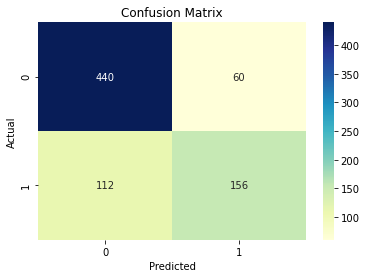

In [41]:
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y, lr_pred)), annot=True, cmap="YlGnBu", fmt='g')
 # annot: number in cell, cmap: color, fmt: string format 
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [42]:
# ROC and AUC

prob = lr.predict_proba(X_test)
prob = lr.predict_proba(X_test)[:,1]  # all rows and 2nd column (= positive class)

fpr, tpr, threshold = roc_curve(y_test, prob)
 # roc_curve takes observed labels with predicted prob and returns fpr,tpr,thresholds for each tpr & fpr

area = auc(fpr, tpr)  # area under the ROC curve
print('Out-of-sample AUC: %0.4f' % auc(fpr, tpr))  # '%0.4f' %: display 4 digit

Out-of-sample AUC: 0.8414


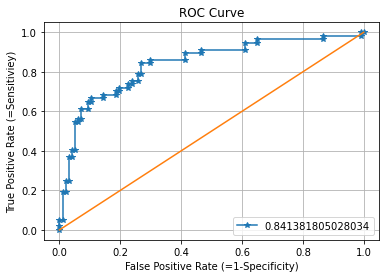

In [43]:
plt.plot(fpr, tpr, label=area, marker='*')
# plt.plot(fpr, tpr, label=('AUC = ', area))
# plt.plot(fpr, tpr, label='AUC = %0.4f' % area)  # 0.4f=4 digits after decimal
plt.plot([0, 1], [0, 1])  # Display straight line
plt.grid()
plt.xlabel('False Positive Rate (=1-Specificity)')
plt.ylabel('True Positive Rate (=Sensitiviey)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [44]:
# MSE MAE and R2

print('MSE', mean_squared_error(y, lr_pred))
print('MAE', mean_absolute_error(y, lr_pred))
print('R2', r2_score(y, lr_pred))

MSE 0.22395833333333334
MAE 0.22395833333333334
R2 0.01420895522388066


- As can be seen, we got very low MSE,MAE and R2 that clearly says our model got fitted good.

## 6. Discussion and Summary
   

#### 1. Summarize your findings and analysis
- According to our explodatory analysis we found some strong relationship with some features and based on that we tried to remove those featurs in our model training to improve model. 
- We tried different models and tried to check whether which strategy could give us good model accuracy.
- In the begining, simple model could not give us better prediction.
- Then, we tried Principle component anaysis but still we got not luck.
- Feature selection gave us good result so we decided to move forward with that.
- And after that, we used K-fold cross validation but that made our model over fitted.
- We tried GridsearhCV on top of that whehter we can improve model or not and that had been proven good option for us because we were able to achive 91.79% accuracy using random forest classifier.
   

#### 2. What further analysis can be done? 
- We analyse the data set on basis of glucose levels, Insulin, BMI and SkinThickness but from this point we can also analyse the data based on other feature as well.
      
